# Task 4-3: 상관관계 히트맵

## 과제 내용
주식 데이터(삼성전자, 카카오, 네이버)를 활용하여 주가 변동을 시각화합니다.
Numpy, Matplotlib, Pandas를 활용하여 다음을 분석합니다:

### 3) 히트맵을 통한 상관관계 분석
- 각 종목 간 주가의 상관관계를 히트맵으로 시각화
- 상관계수 값을 통해 종목 간 연관성 분석


In [4]:
# 필요한 라이브러리 import
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


In [5]:
def load_data():
    """주식 데이터를 로드합니다."""
    csv_path = os.path.join('data', 'stock_close_prices.csv')
    df = pd.read_csv(csv_path)
    companies = df['company'].unique()
    close_data = {}
    for company in companies:
        company_data = df[df['company'] == company]
        close_data[company] = company_data['close'].values
    data = pd.DataFrame(close_data, index=pd.to_datetime(df[df['company'] == companies[0]]['date']))
    return data


In [6]:
def calculate_correlation(data):
    """주식 종목 간 상관관계를 계산합니다."""
    close_data = data[['삼성전자', '카카오', '네이버']]
    correlation_matrix = close_data.corr()
    print("\n📋 상관계수 매트릭스:")
    print(correlation_matrix.round(3))
    return correlation_matrix


In [8]:
def plot_correlation_heatmap(correlation_matrix):
    """상관관계 히트맵을 생성합니다."""
    plt.figure(figsize=(10, 8))
    
    # 히트맵 생성 (matplotlib 방식)
    im = plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
    
    # 색상바 추가
    plt.colorbar(im, shrink=0.8)
    
    # 축 레이블 설정
    plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
    plt.yticks(range(len(correlation_matrix.index)), correlation_matrix.index)
    
    # 제목 설정
    plt.title('주식 종목 간 상관관계 히트맵', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('종목', fontsize=12)
    plt.ylabel('종목', fontsize=12)
    
    # 상관계수 값 표시
    for i in range(len(correlation_matrix.columns)):
        for j in range(len(correlation_matrix.index)):
            plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.3f}', 
                    ha='center', va='center', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    
    # 그래프 저장
    plot_path = os.path.join('plots', 'correlation_heatmap.png')
    plt.savefig(plot_path, dpi=300, bbox_inches='tight')
    plt.show()


 Task 4-3: 상관관계 히트맵
📊 데이터 로드 중...
✅ 데이터 로드 완료: 895일, 3개 종목

📈 상관관계 계산 중...

📋 상관계수 매트릭스:
       삼성전자    카카오    네이버
삼성전자  1.000  0.121  0.061
카카오   0.121  1.000  0.887
네이버   0.061  0.887  1.000

🎨 히트맵 생성 중...


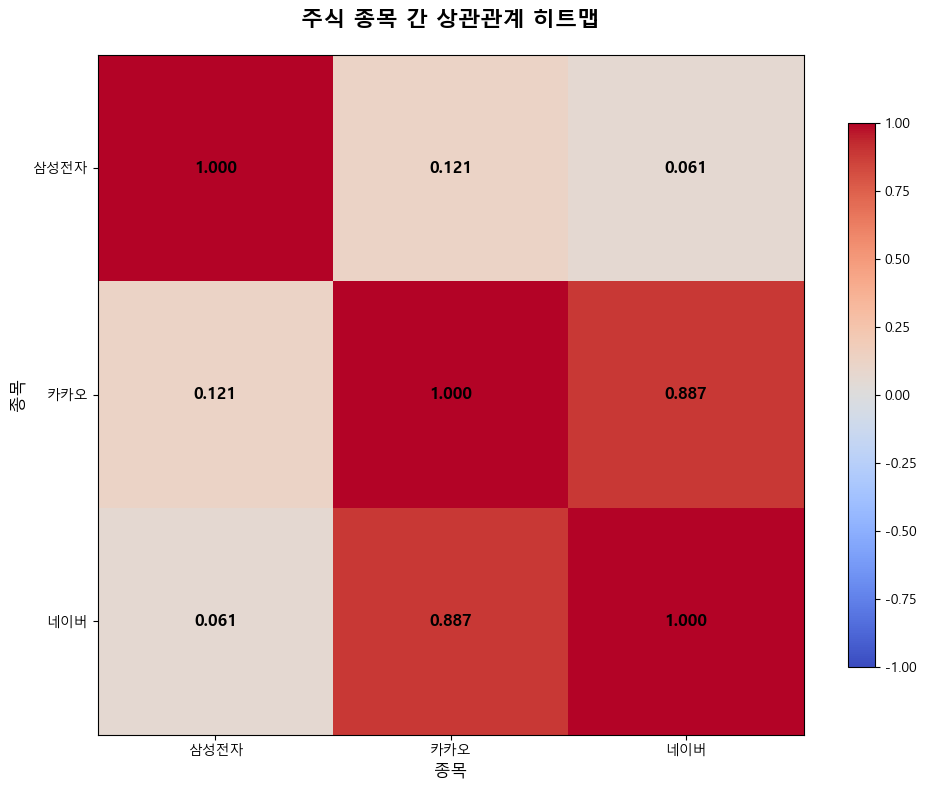


✅ 상관관계 분석 완료!


In [10]:
# 메인 실행
if __name__ == "__main__":
    print("=" * 60)
    print(" Task 4-3: 상관관계 히트맵")
    print("=" * 60)
    
    try:
        # 데이터 로드
        print("📊 데이터 로드 중...")
        data = load_data()
        print(f"✅ 데이터 로드 완료: {data.shape[0]}일, {data.shape[1]}개 종목")
        
        # 상관관계 계산
        print("\n📈 상관관계 계산 중...")
        correlation_matrix = calculate_correlation(data)
        
        # 히트맵 생성
        print("\n🎨 히트맵 생성 중...")
        plot_correlation_heatmap(correlation_matrix)
        
        print("\n✅ 상관관계 분석 완료!")
        
    except Exception as e:
        print(f"❌ 오류 발생: {e}")
